In [23]:
# import libraries
from config import api_key
import requests
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
api = api_key

In [24]:
# query API and set up data frame
url = f'https://api.census.gov/data/2018/abscs?get=EMP,SEX,SEX_LABEL,RACE_GROUP,RACE_GROUP_LABEL,ETH_GROUP,ETH_GROUP_LABEL,YIBSZFI,YIBSZFI_LABEL,FIRMPDEMP&for=us:*&key={api}'
res = requests.get(url)
census_data = res.json()
census_df = pd.DataFrame(census_data)

In [25]:
#create columns
census_df.columns = census_df.loc[0]
census_df.drop(0, inplace = True)
census_df['EMP'] = census_df['EMP'].astype(int)
census_df['YIBSZFI'] = census_df['YIBSZFI'].astype(int)
census_df['FIRMPDEMP'] = census_df['FIRMPDEMP'].astype(int)
census_df.sort_values(by= ['YIBSZFI'], ascending=True, inplace=True)
census_df = census_df[['EMP','SEX_LABEL','RACE_GROUP_LABEL','ETH_GROUP_LABEL', 'YIBSZFI','YIBSZFI_LABEL','FIRMPDEMP']].copy()

In [26]:
#check dataframe
census_df

,EMP,SEX_LABEL,RACE_GROUP_LABEL,ETH_GROUP_LABEL,YIBSZFI,YIBSZFI_LABEL,FIRMPDEMP
413,524526,Equally male/female,Equally minority/nonminority,Total,1,All firms,61556
85,146945,Male,Total,Equally Hispanic/non-Hispanic,1,All firms,10229
309,0,Total,American Indian and Alaska Native,Equally Hispanic/non-Hispanic,1,All firms,0
247,174872,Total,American Indian and Alaska Native,Non-Hispanic,1,All firms,20208
246,0,Equally male/female,American Indian and Alaska Native,Equally Hispanic/non-Hispanic,1,All firms,0
...,...,...,...,...,...,...,...
231,44698,Equally male/female,Black or African American,Total,323,Firms with 16 or more years in business,2753
224,235839,Male,Black or African American,Total,323,Firms with 16 or more years in business,15235
217,122126,Female,Black or African American,Total,323,Firms with 16 or more years in business,7484
298,4409,Equally male/female,American Indian and Alaska Native,Total,323,Firms with 16 or more years in business,271


In [17]:
#create pivot table to display number of firms
number_of_firms = census_df[['YIBSZFI_LABEL','FIRMPDEMP']].copy()
number_of_firms = number_of_firms[number_of_firms['YIBSZFI_LABEL'] != 'All firms']
number_of_firms_pivot = number_of_firms.pivot_table(index='YIBSZFI_LABEL', values='FIRMPDEMP', aggfunc=np.sum)
number_of_firms_pivot

,FIRMPDEMP
YIBSZFI_LABEL,
Firms with 11 to 15 years in business,7117388
Firms with 16 or more years in business,15751862
Firms with 2 to 3 years in business,6345683
Firms with 4 to 5 years in business,4774968
Firms with 6 to 10 years in business,8320785
Firms with less than 2 years in business,7387447


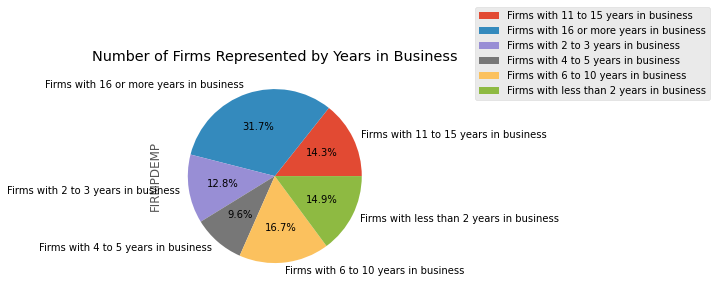

In [18]:
# use pivot table to create pie chart
plt.style.use('ggplot')
number_of_firms_pivot.plot.pie(y='FIRMPDEMP', autopct='%1.1f%%')
plt.title('Number of Firms Represented by Years in Business')
plt.legend(bbox_to_anchor = (1.4,1.3), loc = 'upper left')


In [19]:
#repeat process for number of employees
number_of_employees = census_df[['YIBSZFI_LABEL','EMP']].copy()
number_of_employees = number_of_employees[number_of_employees['YIBSZFI_LABEL'] != 'All firms']
number_of_employees_pivot = number_of_employees.pivot_table(index='YIBSZFI_LABEL', values='EMP', aggfunc=np.sum)
number_of_employees_pivot

,EMP
YIBSZFI_LABEL,
Firms with 11 to 15 years in business,71398505
Firms with 16 or more years in business,372769454
Firms with 2 to 3 years in business,43673066
Firms with 4 to 5 years in business,38665042
Firms with 6 to 10 years in business,77938015
Firms with less than 2 years in business,30982626


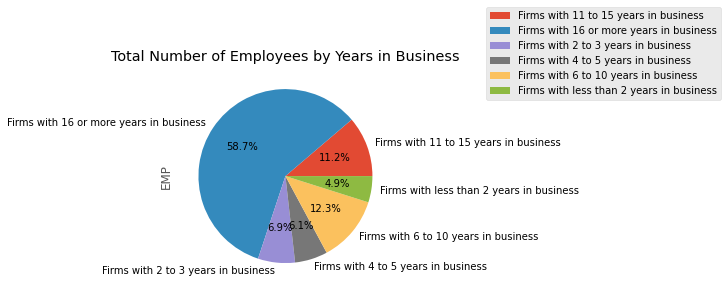

In [20]:
#create pie chart
plt.style.use('ggplot')
number_of_employees_pivot.plot.pie(y='EMP', autopct='%1.1f%%')
plt.title('Total Number of Employees by Years in Business')
plt.legend(bbox_to_anchor = (1.4,1.3), loc = 'upper left')

In [73]:
#create dataframe to make visuals from race demographic makeup
census_race = census_df.copy()
census_race = census_race[census_race['YIBSZFI_LABEL'] != 'All firms'].copy()
census_race = census_race[census_race['RACE_GROUP_LABEL'] != 'Total'].copy()
census_race = census_race[(census_race['RACE_GROUP_LABEL'] != 'Classifiable')&(census_race['RACE_GROUP_LABEL'] != 'Unclassifiable')].copy()
census_race = census_race[(census_race['RACE_GROUP_LABEL'] != 'Minority')&(census_race['RACE_GROUP_LABEL'] != 'Nonminority')].copy()
census_race = census_race[['EMP','RACE_GROUP_LABEL', 'YIBSZFI', 'YIBSZFI_LABEL']].copy()

In [64]:
# census_race['Percent'] = (census_race['EMP']/census_race['EMP'].sum())*100
census_race

,EMP,RACE_GROUP_LABEL,YIBSZFI,YIBSZFI_LABEL
233,4584,Black or African American,311,Firms with less than 2 years in business
183,4084,American Indian and Alaska Native,311,Firms with less than 2 years in business
258,484161,Asian,311,Firms with less than 2 years in business
121,206975,White,311,Firms with less than 2 years in business
151,79101,Black or African American,311,Firms with less than 2 years in business
...,...,...,...,...
238,6637,Black or African American,323,Firms with 16 or more years in business
231,44698,Black or African American,323,Firms with 16 or more years in business
224,235839,Black or African American,323,Firms with 16 or more years in business
217,122126,Black or African American,323,Firms with 16 or more years in business


In [74]:
census_race_pivot = census_race.pivot_table(index='YIBSZFI',columns ='RACE_GROUP_LABEL', values='EMP', aggfunc=sum)
census_race_pivot.sort_values(by=['YIBSZFI'], ascending=False, inplace=True)
census_race_pivot['Sum'] = census_race_pivot.sum(axis=1)
census_race_pivot['American Indian and Alaska Native %'] = (census_race_pivot['American Indian and Alaska Native']/census_race_pivot['Sum'])*100
census_race_pivot['Asian %'] = (census_race_pivot['Asian']/census_race_pivot['Sum'])*100
census_race_pivot['Black African American %'] = (census_race_pivot['Black or African American']/census_race_pivot['Sum'])*100
census_race_pivot['Equally Minority Nonminority %'] = (census_race_pivot['Equally minority/nonminority']/census_race_pivot['Sum'])*100
census_race_pivot['Native Hawaiian and Other Pacific Islander %'] = (census_race_pivot['Native Hawaiian and Other Pacific Islander']/census_race_pivot['Sum'])*100
census_race_pivot['White %'] = (census_race_pivot['White']/census_race_pivot['Sum'])*100

In [75]:
# census_race_pivot = census_race_pivot.drop(['American Indian and Alaska Native', 'Asian','Black or African American', 'Equally minority/nonminority', 'Native Hawaiian and Other Pacific Islander'], axis=1, inplace=True)
census_race_pivot = census_race_pivot[['American Indian and Alaska Native %', 'Asian %', 'Black African American %','Equally Minority Nonminority %', 'Native Hawaiian and Other Pacific Islander %', 'White %']].copy()
census_race_pivot

RACE_GROUP_LABEL,American Indian and Alaska Native %,Asian %,Black African American %,Equally Minority Nonminority %,Native Hawaiian and Other Pacific Islander %,White %
YIBSZFI,,,,,,
323,0.265761,4.809311,1.157961,0.607509,0.066733,93.092725
322,0.425616,9.260966,2.572000,1.090538,0.081452,86.569428
321,0.358374,11.206150,2.724473,1.164687,0.044563,84.501754
319,0.286248,11.623192,3.034098,1.397227,0.081407,83.577827
318,0.345022,15.004904,2.707779,1.174456,0.094576,80.673264
311,0.318625,13.948530,2.278882,1.280397,0.125524,82.048042


C:\Users\Jason Ruckel\AppData\Local\Temp\ipykernel_15140\2610895813.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(['0%', '20%', '40%', '60%', '80%', '100%'])


[Text(0.0, 0, '0%'),
 Text(20.0, 0, '20%'),
 Text(40.0, 0, '40%'),
 Text(60.0, 0, '60%'),
 Text(80.0, 0, '80%'),
 Text(100.0, 0, '100%'),
 Text(120.0, 0, '')]

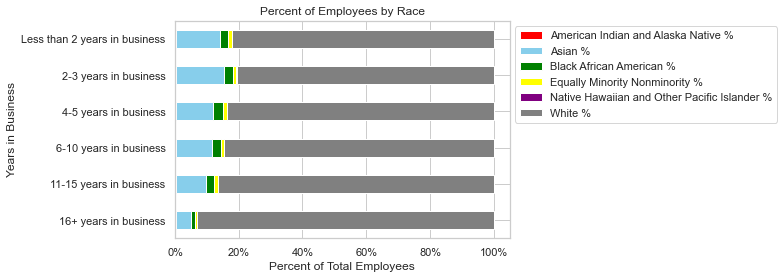

In [77]:
#create stacked bar chart
sns.set_theme(style="whitegrid")
g = census_race_pivot.plot(kind='barh', stacked=True, color=['red', 'skyblue', 'green', 'yellow', 'purple', 'gray'], rot=90)
plt.xlabel('Percent of Total Employees')
plt.ylabel('Years in Business')
 
# title of plot
plt.title('Percent of Employees by Race')
plt.yticks(rotation=360)
plt.legend(bbox_to_anchor = (1,1), loc = 'upper left')
g.set_yticklabels(['16+ years in business', '11-15 years in business', '6-10 years in business', '4-5 years in business', '2-3 years in business', 'Less than 2 years in business'])
g.set_xticklabels(['0%', '20%', '40%', '60%', '80%', '100%'])

In [78]:
#recreate pivot table
census_race_pivot = census_race_pivot[['American Indian and Alaska Native %', 'Asian %', 'Black African American %','Equally Minority Nonminority %', 'Native Hawaiian and Other Pacific Islander %']].copy()
census_race_pivot

RACE_GROUP_LABEL,American Indian and Alaska Native %,Asian %,Black African American %,Equally Minority Nonminority %,Native Hawaiian and Other Pacific Islander %
YIBSZFI,,,,,
323,0.265761,4.809311,1.157961,0.607509,0.066733
322,0.425616,9.260966,2.572000,1.090538,0.081452
321,0.358374,11.206150,2.724473,1.164687,0.044563
319,0.286248,11.623192,3.034098,1.397227,0.081407
318,0.345022,15.004904,2.707779,1.174456,0.094576
311,0.318625,13.948530,2.278882,1.280397,0.125524


C:\Users\Jason Ruckel\AppData\Local\Temp\ipykernel_15140\237014971.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(['0.0%', '2.5%', '5.0%', '7.5%', '10.0%', '12.5%', '15.0%', '17.5%', '20.0%'])


[Text(0.0, 0, '0.0%'),
 Text(2.5, 0, '2.5%'),
 Text(5.0, 0, '5.0%'),
 Text(7.5, 0, '7.5%'),
 Text(10.0, 0, '10.0%'),
 Text(12.5, 0, '12.5%'),
 Text(15.0, 0, '15.0%'),
 Text(17.5, 0, '17.5%'),
 Text(20.0, 0, '20.0%'),
 Text(22.5, 0, '')]

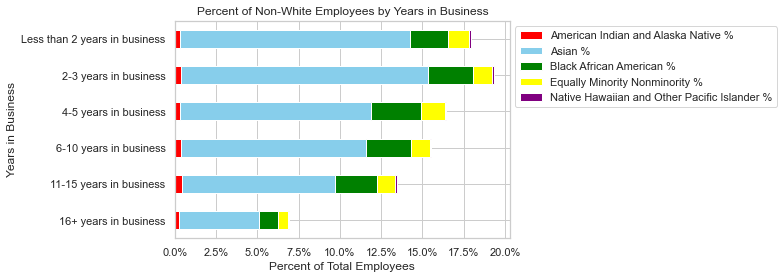

In [81]:
#create visual
sns.set_theme(style="whitegrid")
g = census_race_pivot.plot(kind='barh', stacked=True, color=['red', 'skyblue', 'green', 'yellow', 'purple',], rot=90)
plt.xlabel('Percent of Total Employees')
plt.ylabel('Years in Business')
plt.title('Percent of Non-White Employees by Years in Business')
plt.yticks(rotation=360)
plt.legend(bbox_to_anchor = (1,1), loc = 'upper left')
g.set_yticklabels(['16+ years in business', '11-15 years in business', '6-10 years in business', '4-5 years in business', '2-3 years in business', 'Less than 2 years in business'])
g.set_xticklabels(['0.0%', '2.5%', '5.0%', '7.5%', '10.0%', '12.5%', '15.0%', '17.5%', '20.0%'])

In [82]:
census_df

,EMP,SEX_LABEL,RACE_GROUP_LABEL,ETH_GROUP_LABEL,YIBSZFI,YIBSZFI_LABEL,FIRMPDEMP
413,524526,Equally male/female,Equally minority/nonminority,Total,1,All firms,61556
85,146945,Male,Total,Equally Hispanic/non-Hispanic,1,All firms,10229
309,0,Total,American Indian and Alaska Native,Equally Hispanic/non-Hispanic,1,All firms,0
247,174872,Total,American Indian and Alaska Native,Non-Hispanic,1,All firms,20208
246,0,Equally male/female,American Indian and Alaska Native,Equally Hispanic/non-Hispanic,1,All firms,0
...,...,...,...,...,...,...,...
231,44698,Equally male/female,Black or African American,Total,323,Firms with 16 or more years in business,2753
224,235839,Male,Black or African American,Total,323,Firms with 16 or more years in business,15235
217,122126,Female,Black or African American,Total,323,Firms with 16 or more years in business,7484
298,4409,Equally male/female,American Indian and Alaska Native,Total,323,Firms with 16 or more years in business,271


In [83]:
census_sex = census_df.copy()
census_sex = census_sex[census_sex['YIBSZFI_LABEL'] != 'All firms'].copy()
census_sex = census_sex[census_sex['SEX_LABEL'] != 'Total'].copy()
census_sex = census_sex[['EMP','SEX_LABEL', 'YIBSZFI', 'YIBSZFI_LABEL']].copy()
census_sex

,EMP,SEX_LABEL,YIBSZFI,YIBSZFI_LABEL
442,450778,Male,311,Firms with less than 2 years in business
183,4084,Female,311,Firms with less than 2 years in business
219,37070,Male,311,Firms with less than 2 years in business
449,521040,Female,311,Firms with less than 2 years in business
226,6127,Equally male/female,311,Firms with less than 2 years in business
...,...,...,...,...
231,44698,Equally male/female,323,Firms with 16 or more years in business
224,235839,Male,323,Firms with 16 or more years in business
217,122126,Female,323,Firms with 16 or more years in business
298,4409,Equally male/female,323,Firms with 16 or more years in business


In [85]:
census_sex_pivot = census_sex.pivot_table(index='YIBSZFI',columns ='SEX_LABEL', values='EMP', aggfunc=sum)
census_sex_pivot.sort_values(by=['YIBSZFI'], ascending=False, inplace=True)
census_sex_pivot['Sum'] = census_sex_pivot.sum(axis=1)
census_sex_pivot['Male %'] = (census_sex_pivot['Male']/census_sex_pivot['Sum'])*100
census_sex_pivot['Female %'] = (census_sex_pivot['Female']/census_sex_pivot['Sum'])*100
census_sex_pivot['Equally male/female %'] = (census_sex_pivot['Equally male/female']/census_sex_pivot['Sum'])*100
census_sex_pivot = census_sex_pivot[['Male %','Female %', 'Equally male/female %']].copy()
census_sex_pivot

SEX_LABEL,Male %,Female %,Equally male/female %
YIBSZFI,,,
323,75.874454,13.126855,10.998691
322,66.750810,18.692380,14.556810
321,66.916112,19.574790,13.509098
319,67.850672,18.802129,13.347199
318,65.738894,19.780319,14.480788
311,62.106302,21.703328,16.190369


C:\Users\Jason Ruckel\AppData\Local\Temp\ipykernel_15140\2401743849.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(['0%', '20%', '40%', '60%', '80%', '100%'])


[Text(0.0, 0, '0%'),
 Text(20.0, 0, '20%'),
 Text(40.0, 0, '40%'),
 Text(60.0, 0, '60%'),
 Text(80.0, 0, '80%'),
 Text(100.0, 0, '100%'),
 Text(120.0, 0, '')]

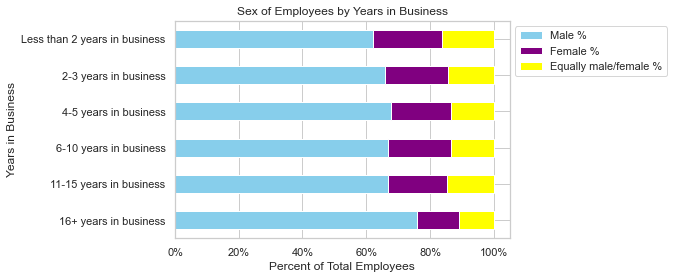

In [89]:
sns.set_theme(style="whitegrid")
g = census_sex_pivot.plot(kind='barh', stacked=True, color=['skyblue', 'purple', 'yellow'], rot=90)
plt.xlabel('Percent of Total Employees')
plt.ylabel('Years in Business')
plt.title('Sex of Employees by Years in Business')
plt.yticks(rotation=360)
plt.legend(bbox_to_anchor = (1,1), loc = 'upper left')
g.set_yticklabels(['16+ years in business', '11-15 years in business', '6-10 years in business', '4-5 years in business', '2-3 years in business', 'Less than 2 years in business'])
g.set_xticklabels(['0%', '20%', '40%', '60%', '80%', '100%'])